In [1]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns

In [2]:
# Read data
ratings=pd.read_csv('Dataset/BX-Book-Ratings.csv',sep=";",encoding='latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [3]:
ratings.shape

(1149780, 3)

In [4]:
# Drop columns with rating = 0
ratings = ratings[ratings['Book-Rating']>0]

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


In [6]:
# Number of users
print('The ratings dataset has', ratings['User-ID'].nunique(), 'unique users')
# Number of books
print('The ratings dataset has', ratings['ISBN'].nunique(), 'unique books')
# Number of ratings
print('The ratings dataset has', ratings['Book-Rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(ratings['Book-Rating'].unique()))

The ratings dataset has 77805 unique users
The ratings dataset has 185973 unique books
The ratings dataset has 10 unique ratings
The unique ratings are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [7]:
books = pd.read_csv('Dataset/BX_Books.csv',sep=";",encoding='latin-1')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
# Drop unnecessary columns
books = books.drop(columns=['Image-URL-S', 'Image-URL-M','Image-URL-L'])

In [9]:
df = pd.merge(ratings, books, on='ISBN', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383852 entries, 0 to 383851
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              383852 non-null  int64 
 1   ISBN                 383852 non-null  object
 2   Book-Rating          383852 non-null  int64 
 3   Book-Title           383852 non-null  object
 4   Book-Author          383850 non-null  object
 5   Year-Of-Publication  383852 non-null  int64 
 6   Publisher            383850 non-null  object
dtypes: int64(3), object(4)
memory usage: 20.5+ MB


In [10]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday


In [11]:
# Aggregate by book
agg_ratings = df.groupby('ISBN').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()

# Keep the books with over 7 ratings
agg_ratings_GT7 = agg_ratings[agg_ratings['number_of_ratings']>5]
agg_ratings_GT7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7308 entries, 39 to 149252
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               7308 non-null   object 
 1   mean_rating        7308 non-null   float64
 2   number_of_ratings  7308 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 228.4+ KB


In [12]:
agg_ratings_GT7.sort_values(by='number_of_ratings', ascending=False).head()

,ISBN,mean_rating,number_of_ratings
21946,0316666343,8.185290,707
117750,0971880107,4.390706,581
38820,0385504209,8.435318,487
18059,0312195516,8.182768,383
4132,0060928336,7.887500,320


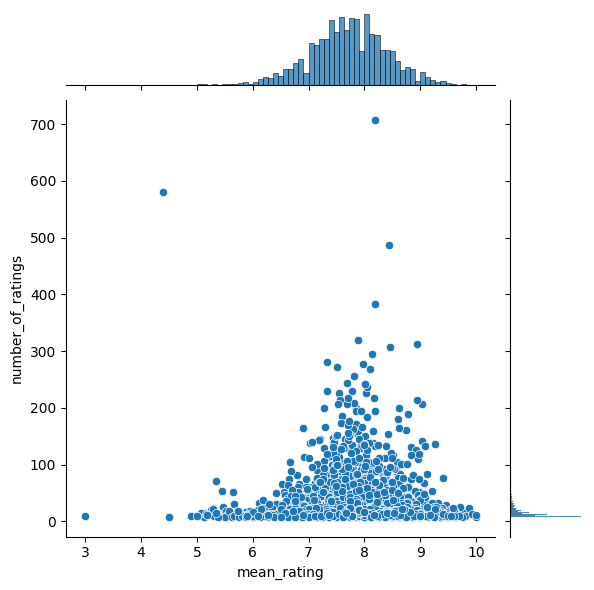

In [13]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT7)

In [14]:
# Keep only 7308 books with more than 7 ratings
df_GT7 = pd.merge(df, agg_ratings_GT7[['ISBN']], on='ISBN', how='inner')
df_GT7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154993 entries, 0 to 154992
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              154993 non-null  int64 
 1   ISBN                 154993 non-null  object
 2   Book-Rating          154993 non-null  int64 
 3   Book-Title           154993 non-null  object
 4   Book-Author          154993 non-null  object
 5   Year-Of-Publication  154993 non-null  int64 
 6   Publisher            154993 non-null  object
dtypes: int64(3), object(4)
memory usage: 8.3+ MB


In [15]:
df_GT7.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
1,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday
2,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday
3,17975,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday
4,20806,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday


In [16]:
# Keep only users who rated more than 7 times
user_ratings_GT7 = df_GT7.groupby('User-ID').agg(number_of_ratings = ('User-ID', 'count')).reset_index()
user_ratings_GT7 = user_ratings_GT7[user_ratings_GT7['number_of_ratings']>5]
user_ratings_GT7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3791 entries, 34 to 41965
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   User-ID            3791 non-null   int64
 1   number_of_ratings  3791 non-null   int64
dtypes: int64(2)
memory usage: 88.9 KB


In [17]:
user_ratings_GT7.sort_values(by='number_of_ratings', ascending=False).head()

,User-ID,number_of_ratings
1660,11676,2256
14785,98391,473
2370,16795,380
23270,153662,366
14377,95359,323


In [18]:
# Keep only the 3971 users
user_ratings_GT7 = df_GT7.groupby('User-ID').agg(number_of_ratings = ('User-ID', 'count')).reset_index()
user_ratings_GT7 = user_ratings_GT7[user_ratings_GT7['number_of_ratings']>5]

df_GT7 = pd.merge(df_GT7, user_ratings_GT7[['User-ID']], on='User-ID', how='inner')
df_GT7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87206 entries, 0 to 87205
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              87206 non-null  int64 
 1   ISBN                 87206 non-null  object
 2   Book-Rating          87206 non-null  int64 
 3   Book-Title           87206 non-null  object
 4   Book-Author          87206 non-null  object
 5   Year-Of-Publication  87206 non-null  int64 
 6   Publisher            87206 non-null  object
dtypes: int64(3), object(4)
memory usage: 4.7+ MB


In [19]:
df_GT7.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday
1,11676,0671537458,8,Waiting to Exhale,Terry McMillan,1995,Pocket
2,11676,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA
3,11676,0684867621,3,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner
4,11676,3548603203,9,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg


In [20]:
# Dataset after filtering
print('The ratings dataset has', df_GT7['User-ID'].nunique(), 'unique users')
print('The ratings dataset has', df_GT7['ISBN'].nunique(), 'unique books')
print('The ratings dataset has', df_GT7['Book-Rating'].nunique(), 'unique ratings')
print('The unique ratings are', sorted(df_GT7['Book-Rating'].unique()))

The ratings dataset has 3791 unique users
The ratings dataset has 7265 unique books
The ratings dataset has 10 unique ratings
The unique ratings are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [21]:
# Create user-item matrix
matrix = df_GT7.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
matrix.head()

Book-Title,'Salem's Lot,01-01-00: The Novel of the Millennium,10 Lb. Penalty,100 Selected Poems by E. E. Cummings,1001 Ways to Be Romantic,"14,000 Things to Be Happy About",16 Lighthouse Road,1632 (Assiti Shards (Paperback)),1984,1st to Die: A Novel,...,Zoya,ZwÃ?Â¶lf.,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""","\Girls' Night Out\""/\""Boys' Night In\""""","\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,one hundred years of solitude,stardust
User-ID,,,,,,,,,,,,,,,,,,,,,
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

Book-Title,'Salem's Lot,01-01-00: The Novel of the Millennium,10 Lb. Penalty,100 Selected Poems by E. E. Cummings,1001 Ways to Be Romantic,"14,000 Things to Be Happy About",16 Lighthouse Road,1632 (Assiti Shards (Paperback)),1984,1st to Die: A Novel,...,Zoya,ZwÃ?Â¶lf.,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""","\Girls' Night Out\""/\""Boys' Night In\""""","\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,one hundred years of solitude,stardust
User-ID,,,,,,,,,,,,,,,,,,,,,
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.729167,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# User similarity matrix using Pearson correlation
user_similarity1 = matrix_norm.T.corr()
user_similarity1.head()

User-ID,243,254,503,507,638,643,805,882,929,1025,...,278202,278221,278356,278390,278418,278535,278554,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Make suggestion for an user
userid = 254
# Remove picked user ID from the candidate list
user_similarity = user_similarity1.copy()
user_similarity.drop(index=userid, inplace=True)
user_similarity.head()

User-ID,243,254,503,507,638,643,805,882,929,1025,...,278202,278221,278356,278390,278418,278535,278554,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Number of similar users
n = 5

# User similarity threashold
user_similarity_threshold = 0.5

# Get top n similar users
similar_users = user_similarity[user_similarity[userid]>user_similarity_threshold][userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {userid} are', similar_users)

The similar users for user 254 are User-ID
507       1.0
179019    1.0
3827      1.0
112953    1.0
129084    1.0
Name: 254, dtype: float64


In [43]:
# Books that the target user has read
picked_userid_read = matrix_norm[matrix_norm.index == userid].dropna(axis=1, how='all')
picked_userid_read

Book-Title,1984,American Gods,American Gods: A Novel,Animal Farm,Complete Chronicles of Narnia,"Familiar Lullaby (Fear Familiar) (Harlequin Intrigue, No 614)",Harry Potter and the Chamber of Secrets (Book 2),Harry Potter and the Goblet of Fire (Book 4),Harry Potter and the Prisoner of Azkaban (Book 3),Harry Potter and the Sorcerer's Stone (Book 1),...,Smoke and Mirrors: Short Fictions and Illusions,Something Wicked This Way Comes,"The Adrian Mole Diaries : The Secret Diary of Adrian Mole, Aged 13 3/4 : The Growing Pains of Adrian Mole",The Bonesetter's Daughter,The Dark Half,"The Fellowship of the Ring (The Lord of the Rings, Part 1)","The Golden Compass (His Dark Materials, Book 1)",The Hobbit: or There and Back Again,"The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2)",The Secret Life of Bees
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.729167,1.729167,0.729167,-0.270833,-3.270833,-3.270833,0.729167,0.729167,0.729167,0.729167,...,0.729167,-0.270833,-0.270833,0.729167,-0.270833,-0.270833,0.229167,0.729167,-1.270833,0.729167


In [44]:
# Books that similar users has read
similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_books

Book-Title,1984,2nd Chance,A Kiss of Shadows (Meredith Gentry Novels (Paperback)),A Monk Swimming,A Passage to India,A Plague of Angels,A Prayer for Owen Meany,A Treasure Worth Seeking,About a Boy,Against All Enemies: Inside America's War on Terror,...,The Unknown Errors of Our Lives: Stories,Things Fall Apart : A Novel,Timeline,Touching Evil,Unspeakable,Up Country: A Novel,Walden Two (Trade Book),We Were the Mulvaneys,"Whisper of Evil (Hooper, Kay. Evil Trilogy.)",Zodiac: The Eco-Thriller
User-ID,,,,,,,,,,,,,,,,,,,,,
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47619,...,NaN,NaN,NaN,-1.52381,NaN,NaN,NaN,NaN,-1.52381,NaN
3827,NaN,NaN,-1.666667,NaN,NaN,1.333333,NaN,NaN,NaN,NaN,...,1.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333
112953,1.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.611111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.388889,NaN,NaN,NaN
129084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.153846,NaN,NaN,...,NaN,NaN,-0.153846,NaN,-0.153846,NaN,NaN,-0.153846,NaN,NaN
179019,NaN,-2.833333,NaN,0.166667,2.166667,NaN,3.166667,NaN,NaN,NaN,...,NaN,1.166667,NaN,NaN,NaN,-2.833333,NaN,NaN,NaN,NaN


In [48]:
# Remove the books that read by picked user from the book list
similar_user_books.drop(picked_userid_read.columns,axis=1, inplace=True, errors='ignore')
similar_user_books

Book-Title,2nd Chance,A Kiss of Shadows (Meredith Gentry Novels (Paperback)),A Monk Swimming,A Passage to India,A Plague of Angels,A Prayer for Owen Meany,A Treasure Worth Seeking,About a Boy,Against All Enemies: Inside America's War on Terror,American Psycho (Vintage Contemporaries),...,The Unknown Errors of Our Lives: Stories,Things Fall Apart : A Novel,Timeline,Touching Evil,Unspeakable,Up Country: A Novel,Walden Two (Trade Book),We Were the Mulvaneys,"Whisper of Evil (Hooper, Kay. Evil Trilogy.)",Zodiac: The Eco-Thriller
User-ID,,,,,,,,,,,,,,,,,,,,,
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47619,NaN,...,NaN,NaN,NaN,-1.52381,NaN,NaN,NaN,NaN,-1.52381,NaN
3827,NaN,-1.666667,NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN,...,1.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333
112953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.611111,NaN,-0.611111,...,NaN,NaN,NaN,NaN,NaN,NaN,0.388889,NaN,NaN,NaN
129084,NaN,NaN,NaN,NaN,NaN,NaN,-1.153846,NaN,NaN,NaN,...,NaN,NaN,-0.153846,NaN,-0.153846,NaN,NaN,-0.153846,NaN,NaN
179019,-2.833333,NaN,0.166667,2.166667,NaN,3.166667,NaN,NaN,NaN,NaN,...,NaN,1.166667,NaN,NaN,NaN,-2.833333,NaN,NaN,NaN,NaN


In [49]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_books.columns:
    # Get the ratings for book i
    book_rating = similar_user_books[i]
    # Create a variable to store the score
    total = 0
    # Create a variable to store the number of scores
    count = 0
    # Loop through similar users
    for u in similar_users.index:
        # If the book has rating
        if pd.isna(book_rating[u]) == False:
            # Score is the sum of user similarity score multiply by the book rating
            score = similar_users[u] * book_rating[u]
            # Add the score to the total score for the book so far
            total += score
            # Add 1 to the count
            count +=1
    # Get the average score for the item
    item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['book', 'score'])
    
# Sort the books by score
item_score = item_score.sort_values(by='score', ascending=False)

# Select top m books
m = 10
item_score.head(m)

,book,score
127,"The Return of the King (The Lord of the Rings,...",3.166667
5,A Prayer for Owen Meany,3.166667
104,The Curious Incident of the Dog in the Night-T...,2.166667
84,Siddhartha,2.166667
52,Into Thin Air : A Personal Account of the Mt. ...,2.166667
100,The Bell Jar,2.166667
87,Slaughterhouse Five or the Children's Crusade:...,2.166667
53,Jitterbug Perfume,2.166667
73,Prey,2.166667
3,A Passage to India,2.166667


In [50]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == userid].T.mean()[userid]

# Print the average book rating for chosen user
print(f'The average book rating for user {userid} is {avg_rating:.2f}')

The average book rating for user 254 is 8.27


In [51]:
# Calculate the predicted rating
item_score['predicted_rating'] = item_score['score'] + avg_rating
item_score.head(m)

,book,score,predicted_rating
127,"The Return of the King (The Lord of the Rings,...",3.166667,11.4375
5,A Prayer for Owen Meany,3.166667,11.4375
104,The Curious Incident of the Dog in the Night-T...,2.166667,10.4375
84,Siddhartha,2.166667,10.4375
52,Into Thin Air : A Personal Account of the Mt. ...,2.166667,10.4375
100,The Bell Jar,2.166667,10.4375
87,Slaughterhouse Five or the Children's Crusade:...,2.166667,10.4375
53,Jitterbug Perfume,2.166667,10.4375
73,Prey,2.166667,10.4375
3,A Passage to India,2.166667,10.4375


In [47]:
def getSuggestions(userid):
    user_similarity = user_similarity1.copy()
    user_similarity.drop(index=userid, inplace=True)
    
    n = 7
    user_similarity_threshold = 0.5
    similar_users = user_similarity[user_similarity[userid]>user_similarity_threshold][userid].sort_values(ascending=False)[:n]
    picked_userid_read = matrix_norm[matrix_norm.index == userid].dropna(axis=1, how='all')
    similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
    similar_user_books.drop(picked_userid_read.columns,axis=1, inplace=True, errors='ignore')
    
    item_score = {}
    for i in similar_user_books.columns:
        book_rating = similar_user_books[i]
        total = 0
        count = 0
        for u in similar_users.index:
            if pd.isna(book_rating[u]) == False:
                score = similar_users[u] * book_rating[u]
                total += score
                count +=1
        item_score[i] = total / count
    item_score = pd.DataFrame(item_score.items(), columns=['book', 'score'])
    item_score = item_score.sort_values(by='score', ascending=False)

    m = 10
    return item_score['book'].to_numpy()

In [45]:
# Evaluation
def catalog_coverage(recommended_items_list, catalog_items):
    # Flatten the list of recommended items and convert it to a set
    unique_recommended_items = set(item for sublist in recommended_items_list for item in sublist)
    
    # Calculate the intersection of unique recommended items and catalog items
    covered_items = unique_recommended_items.intersection(catalog_items)
    
    # Calculate the catalog coverage
    coverage = len(covered_items) / len(catalog_items)
    return coverage

In [34]:
users_rated_GT7 = user_ratings_GT7['User-ID'].to_numpy()
recommended_items_list = [[] for i in range(len(users_rated_GT7))]
catalog_items = books['Book-Title'].to_numpy()

for i in range(len(users_rated_GT7)):
    recommended_items_list[i] = getSuggestions(users_rated_GT7[i])

coverage = catalog_coverage(recommended_items_list, catalog_items)
print(f"Catalog Coverage: {coverage}")

Catalog Coverage: 0.0236938009204839
